In [9]:
!pip install scikit-learn

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [190]:
df = pd.read_csv('Data/Treasury Squeeze raw score data.csv')
df

,rowindex,contract,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio,squeeze
0,1,TUZ92 Comdty,0.157659,0.900783,0.016053,1.000000,1.000000,0.902811,1.000000,0.010743,0.099313,True
1,2,TUH93 Comdty,0.018588,1.000000,1.000000,0.084724,0.778847,1.000000,0.136069,0.154116,1.000000,False
2,3,TUM93 Comdty,0.035755,0.045987,0.673543,1.000000,0.027689,0.067889,0.007696,0.034743,0.171676,False
3,4,TUU93 Comdty,0.663832,1.000000,0.063057,0.188899,0.064454,0.005742,0.166102,0.956668,1.000000,True
4,5,TUZ93 Comdty,0.109678,0.113601,0.726244,1.000000,1.000000,1.000000,1.000000,0.105467,0.145025,False
...,...,...,...,...,...,...,...,...,...,...,...,...
895,896,USU96 Comdty,0.850482,0.106219,1.000000,1.000000,0.143183,0.039113,1.000000,0.942108,0.879261,False
896,897,USZ96 Comdty,1.000000,0.048638,0.193619,1.000000,0.889959,0.129162,0.137239,1.000000,1.000000,False
897,898,USH97 Comdty,0.914224,0.080241,1.000000,0.000310,0.010017,0.095047,1.000000,0.179392,0.973741,True
898,899,USM97 Comdty,0.188539,0.677024,0.889069,0.172883,0.122178,0.761967,0.159114,0.967726,0.087070,True


In [191]:
data=df.iloc[:,2:]

In [192]:
data['squeeze']=data['squeeze'].apply(lambda x: 1 if x==True else 0)

In [193]:
data

,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio,squeeze
0,0.157659,0.900783,0.016053,1.000000,1.000000,0.902811,1.000000,0.010743,0.099313,1
1,0.018588,1.000000,1.000000,0.084724,0.778847,1.000000,0.136069,0.154116,1.000000,0
2,0.035755,0.045987,0.673543,1.000000,0.027689,0.067889,0.007696,0.034743,0.171676,0
3,0.663832,1.000000,0.063057,0.188899,0.064454,0.005742,0.166102,0.956668,1.000000,1
4,0.109678,0.113601,0.726244,1.000000,1.000000,1.000000,1.000000,0.105467,0.145025,0
...,...,...,...,...,...,...,...,...,...,...
895,0.850482,0.106219,1.000000,1.000000,0.143183,0.039113,1.000000,0.942108,0.879261,0
896,1.000000,0.048638,0.193619,1.000000,0.889959,0.129162,0.137239,1.000000,1.000000,0
897,0.914224,0.080241,1.000000,0.000310,0.010017,0.095047,1.000000,0.179392,0.973741,1
898,0.188539,0.677024,0.889069,0.172883,0.122178,0.761967,0.159114,0.967726,0.087070,1


In [194]:
X=data.iloc[:,:9]
y=data.loc[:,'squeeze']

In [195]:
X

,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio
0,0.157659,0.900783,0.016053,1.000000,1.000000,0.902811,1.000000,0.010743,0.099313
1,0.018588,1.000000,1.000000,0.084724,0.778847,1.000000,0.136069,0.154116,1.000000
2,0.035755,0.045987,0.673543,1.000000,0.027689,0.067889,0.007696,0.034743,0.171676
3,0.663832,1.000000,0.063057,0.188899,0.064454,0.005742,0.166102,0.956668,1.000000
4,0.109678,0.113601,0.726244,1.000000,1.000000,1.000000,1.000000,0.105467,0.145025
...,...,...,...,...,...,...,...,...,...
895,0.850482,0.106219,1.000000,1.000000,0.143183,0.039113,1.000000,0.942108,0.879261
896,1.000000,0.048638,0.193619,1.000000,0.889959,0.129162,0.137239,1.000000,1.000000
897,0.914224,0.080241,1.000000,0.000310,0.010017,0.095047,1.000000,0.179392,0.973741
898,0.188539,0.677024,0.889069,0.172883,0.122178,0.761967,0.159114,0.967726,0.087070


In [196]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split

In [204]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=42)

In [211]:
X_scaler = StandardScaler().fit(X_train)
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)


In [212]:
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier()

In [213]:
print(clf.coef_)
print(clf.intercept_)

[[ 0.2170633   0.72202692 -0.07373613  0.25601461  0.24026692 -0.86609701
   0.13091543  0.02097483  1.77914643]]
[-0.52787784]


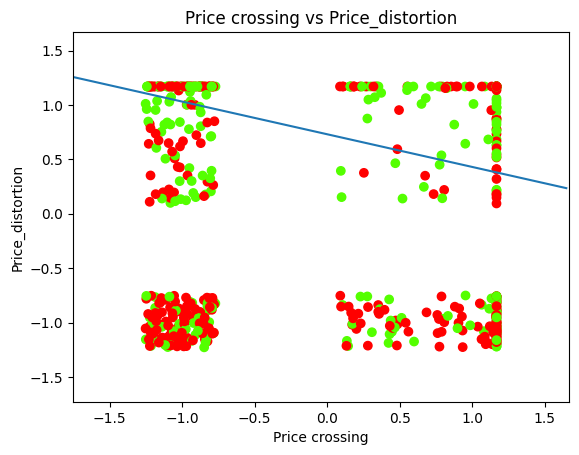

In [214]:
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
xs = np.arange(x_min, x_max, 0.1)

plt.title('Price crossing vs Price_distortion')
plt.xlabel('Price crossing')
plt.ylabel('Price_distortion')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
ys = (-clf.intercept_ - xs * clf.coef_[0,0]) / clf.coef_[0,1]
plt.plot(xs, ys)
plt.show()

In [215]:
y_pred_train=clf.predict(X_train)
y_pred_test=clf.predict(X_test)

In [216]:
train_acc=accuracy_score(y_pred_train,y_train)
test_acc=accuracy_score(y_pred_test,y_test)

In [217]:
train_acc

0.6119402985074627

In [218]:
test_acc

0.5959595959595959

In [219]:
print(classification_report(y_test,y_pred_test,target_names=['False','True']))

              precision    recall  f1-score   support

       False       0.64      0.67      0.65       168
        True       0.54      0.50      0.52       129

    accuracy                           0.60       297
   macro avg       0.59      0.59      0.59       297
weighted avg       0.59      0.60      0.59       297



In [220]:
print("My name is Samanvay Malapally Sudhakara")
print("My NetID is: SM105")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Samanvay Malapally Sudhakara
My NetID is: SM105
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
